In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-50, 50, 2500)

# Sigmoid function

$$
S(x) = \frac{1}{1 + \mathrm{exp}\left(-\alpha x\right)}
$$

$$
S'(x) = \frac{2\alpha \cdot \mathrm{exp}\left(-\alpha x\right)}{\left[1 + \mathrm{exp}\left(-\alpha x\right)\right]^2}
$$

In [2]:
def sigmoid(alpha, x):
    return 1 / (1 + np.exp(-alpha * x))


def derivative_sigmoid(alpha, x):
    exp = np.exp(-alpha * x)
    return (2 * alpha * exp) / (1 + exp)**2

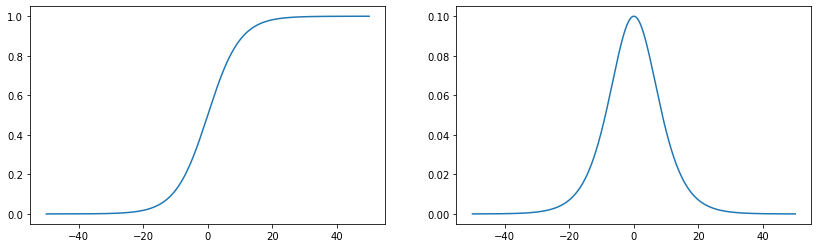

In [3]:
alpha = 0.2
fig, ax = plt.subplots(1, 2, figsize=[14, 4])
ax[0].plot(x, sigmoid(alpha, x))
ax[1].plot(x, derivative_sigmoid(alpha, x));

# Get the characteristic length

The maximum of the Sigmoid's derivative function is:

$$
    S'_{\max} = S'(0) =  \frac{2\alpha}{2^2} = \frac{\alpha}{2}
$$

According to this fact, we define the characteristic length as:

$$
    S'(l_s) = S'(-l_s) = \frac{S'_{\max}}{25} = \frac{\alpha}{50}
$$

Assuming $y = \exp\left(-\alpha x\right)$, we have:

$$
    \frac{2\alpha y}{\left(1 + y\right)^2} = \frac{\alpha}{50}
$$

And we give the iteration rules as:

$$
    y_{k+1} = \frac{1}{100 \cdot \left(1 + y_{k}\right)^2}
$$

$$
    l_s = -\frac{\ln(y_{k_{\max}})}{\alpha}
$$

In [4]:
def get_sigmoid_length(alpha):
    y = 1
    for i in range(500):
        y = (y + 1)**2 / 100
    return float(-np.log(np.abs(y)) / alpha)

In [5]:
def visulize_characteristic_length(alpha):
    sigmoid_length = get_sigmoid_length(alpha)
    print('alpha: %.3f' % alpha)
    print('ls: %.3f' % sigmoid_length)
    print('S(ls): %.3f' % sigmoid(alpha, sigmoid_length))
    print('Target S\'(ls)：%.3f' % (alpha / 50))
    print('S\'(ls): %.3f' % derivative_sigmoid(alpha, sigmoid_length))

    fig, ax = plt.subplots(1, 2, figsize=[14, 4])

    ax[0].plot(x, sigmoid(alpha, x))
    ax[0].plot([-sigmoid_length, -sigmoid_length], [0, 1], '--', c='red')
    ax[0].plot([sigmoid_length, sigmoid_length], [0, 1], '--', c='red')

    ax[1].plot(x, derivative_sigmoid(alpha, x))
    ax[1].plot([-sigmoid_length, -sigmoid_length], [0, alpha / 2], '--', c='red')
    ax[1].plot([sigmoid_length, sigmoid_length], [0, alpha / 2], '--', c='red')

## $\alpha=1$

alpha: 1.000
ls: 4.585
S(ls): 0.990
Target S'(ls)：0.020
S'(ls): 0.020


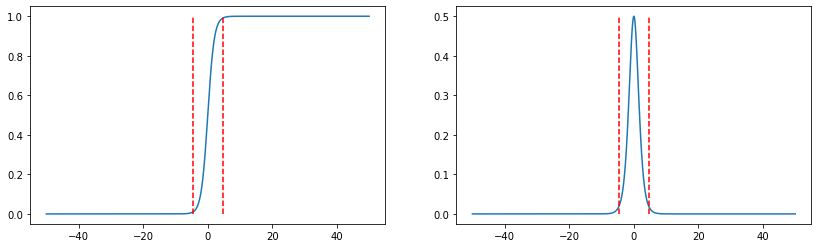

In [6]:
visulize_characteristic_length(1)

## $\alpha=0.2$

alpha: 0.200
ls: 22.924
S(ls): 0.990
Target S'(ls)：0.004
S'(ls): 0.004


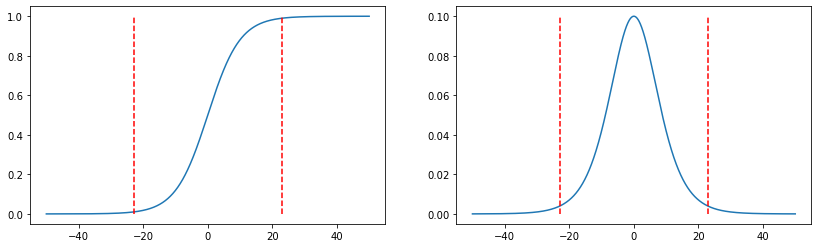

In [7]:
visulize_characteristic_length(0.2)

# Reasoning $\alpha$ from $l_s$

According to the definition of $l_s$:

$$
    S'(l_s) = S'(-l_s) = \frac{S'_{\max}}{25} = \frac{\alpha}{50}
$$

We have the relationship:

$$
    \alpha = 50 \cdot \frac{2\alpha \cdot \mathrm{exp}\left(-\alpha l_s\right)}{\left[1 + \mathrm{exp}\left(-\alpha l_s\right)\right]^2}
$$

Assuming $y = \exp\left(-\alpha l_s\right)$, we have:

$$
y = \frac{\left(1 + y\right)^2}{100}
$$

In [8]:
def reasoning_alpha(ls):
    y = 1
    for i in range(100):
        y = (1 + y**2) / 100
    return float(-np.log(np.abs(y)) / ls)

## Test

In [9]:
for alpha in [0.1, 0.2, 0.5, 1, 2, 5, 10]:
    ls = get_sigmoid_length(alpha)
    log = 'alpha: %.2f; ' % alpha
    log += 'ls: %.3f; ' % ls
    log += 'Reasoning result: %.2f' % reasoning_alpha(ls)
    print(log)

alpha: 0.10; ls: 45.849; Reasoning result: 0.10
alpha: 0.20; ls: 22.924; Reasoning result: 0.20
alpha: 0.50; ls: 9.170; Reasoning result: 0.50
alpha: 1.00; ls: 4.585; Reasoning result: 1.00
alpha: 2.00; ls: 2.292; Reasoning result: 2.01
alpha: 5.00; ls: 0.917; Reasoning result: 5.02
alpha: 10.00; ls: 0.458; Reasoning result: 10.04


## Relationship of $\alpha-l_s$

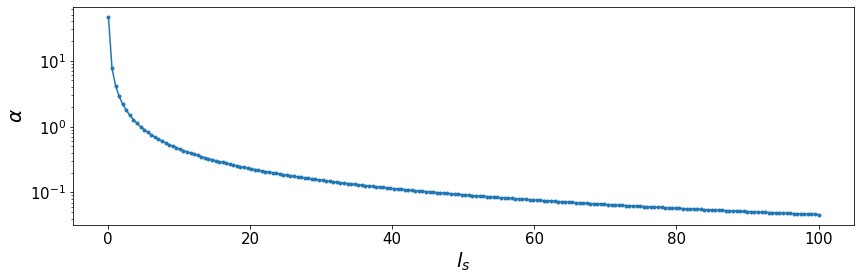

In [10]:
ls = np.linspace(0.1, 100, 200, endpoint=True)
alpha = np.array([reasoning_alpha(i) for i in ls])

fig, ax = plt.subplots(1, 1, figsize=[14, 4])
ax.semilogy(ls, alpha, '.-')
ax.tick_params(labelsize=15)
ax.set_xlabel(r'$l_s$', fontsize=20)
ax.set_ylabel(r'$\alpha$', fontsize=20);